# Statistics 101

### Frederico Horst

#### dataset: 
we will use the penguins dataset from seaborn library

In [1]:
import pandas 
import seaborn as sns 

penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [2]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Histograms part
Generating a normal distribution

In [3]:
import numpy
import pandas

# normal = numpy.random.normal(loc=4201.754386, scale=801.954536, size=(2, 342))
normal = numpy.random.normal(loc=4201.754386, scale=801.954536, size=342)
normal = pandas.DataFrame(normal)

normal.to_csv('normal.csv')

normal.describe()

,0
count,342.000000
mean,4184.324246
std,813.535279
min,1341.689144
25%,3678.953171
50%,4119.582312
75%,4763.349156
max,6530.766097


### Hypothesis Testing

Bootstrap Resampling

In [4]:
import numpy as np

# Bootstrap Resampling

# bootstrap replicas
def bootstrap_replicate_1d(data, func):
     """Generate bootstrap replicate of 1D data."""
     bs_sample = np.random.choice(data, len(data))
     return func(bs_sample)

# many bootstraps replicas
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [5]:
# Calculating the samples:
body_mass_g = penguins.body_mass_g.copy().dropna().reset_index()
body_mass_g_sample = draw_bs_reps(body_mass_g.body_mass_g, np.mean, size=100000)

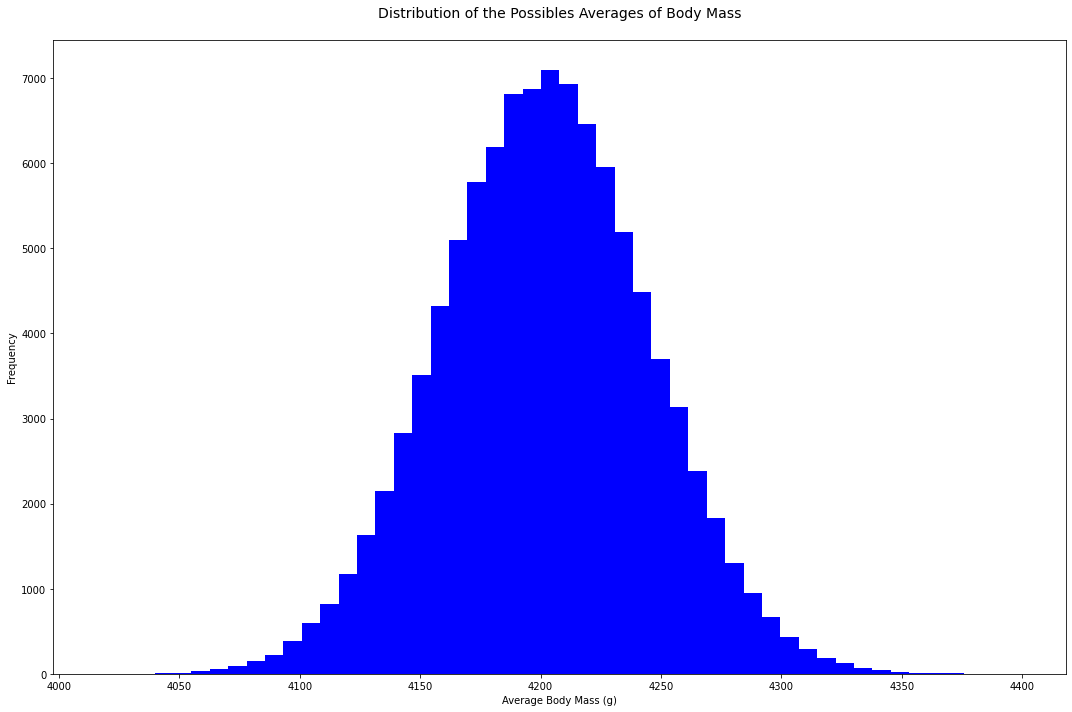

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt

# Plotting a histogram of averages
f = plt.figure(figsize=(15,10))
f = plt.hist(body_mass_g_sample, bins=50,color = 'blue')
f = plt.xlabel('Average Body Mass (g)')
f = plt.ylabel('Frequency')
f = plt.title('Distribution of the Possibles Averages of Body Mass\n', fontsize = 14) #fontweight = 'bold'
# f = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
f = plt.tight_layout()
plt.show()

plt.savefig('body_mass_g_sample.jpg')

Hypothesis Testing:
- H0: mean = 0
- H1: mean != 0


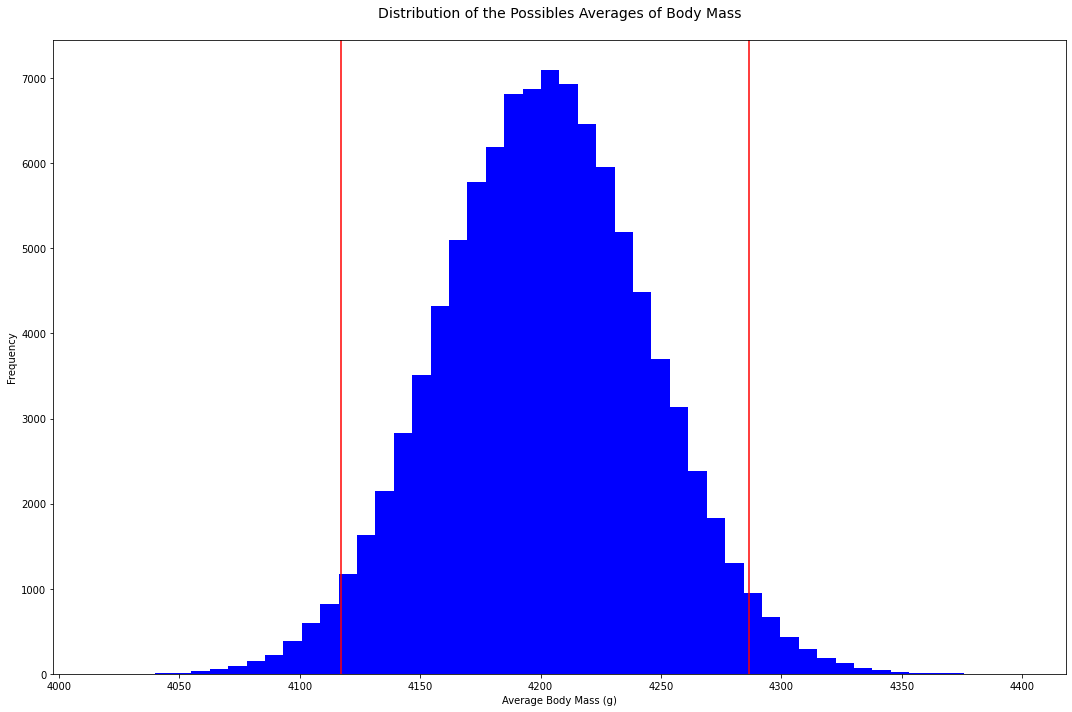

<Figure size 432x288 with 0 Axes>

In [7]:


# Plotting a histogram of averages
f = plt.figure(figsize=(15,10))
f = plt.hist(body_mass_g_sample, bins=50,color = 'blue')
f = plt.axvline(x=np.percentile(body_mass_g_sample, [2.5]), color = 'red')
f = plt.axvline(x=np.percentile(body_mass_g_sample, [97.5]), color = 'red')
f = plt.xlabel('Average Body Mass (g)')
f = plt.ylabel('Frequency')
f = plt.title('Distribution of the Possibles Averages of Body Mass\n', fontsize = 14) #fontweight = 'bold'
# f = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
f = plt.tight_layout()
plt.show()

plt.savefig('body_mass_g_sample_test.jpg')

In [9]:
print(np.percentile(body_mass_g_sample, [2.5]))
print(np.percentile(body_mass_g_sample, [97.5]))

[4117.10343567]
[4286.62280702]


Now let's test if body mass is different for each three species:

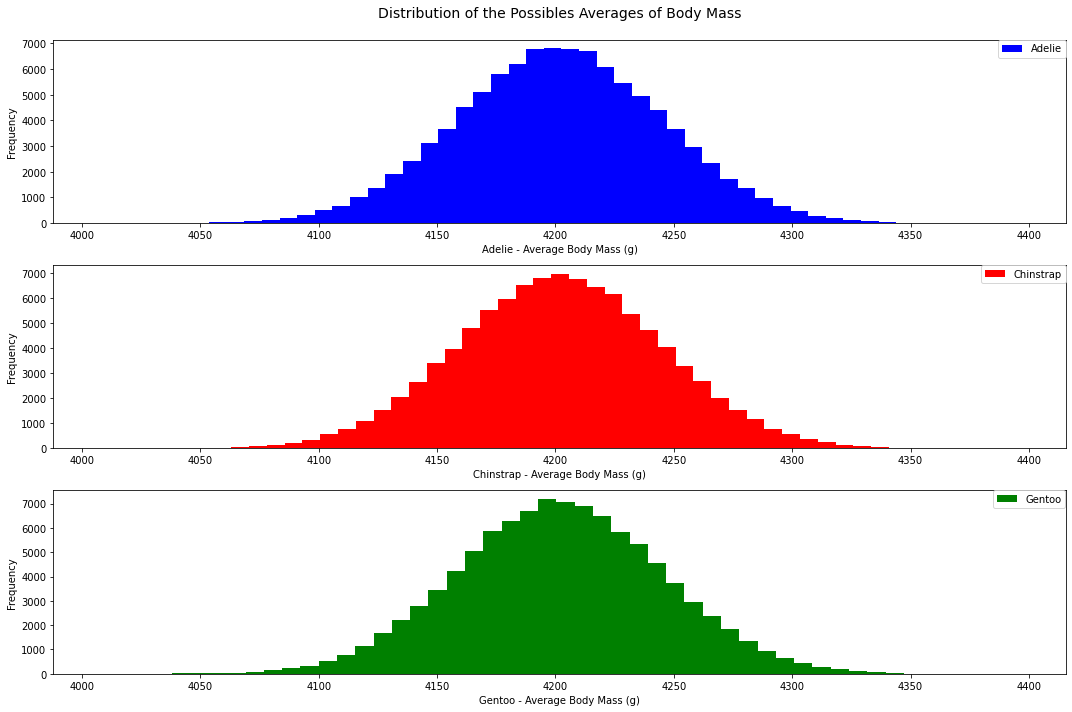

In [8]:
species = penguins.species.unique()
size = 100000

# Calculating the samples:
body_mass_gAdelie = penguins[penguins.species == 'Adelie'].copy()
body_mass_gAdelie = body_mass_gAdelie.body_mass_g.dropna().reset_index()
Adelie = draw_bs_reps(body_mass_g.body_mass_g, np.mean, size=size)

body_mass_gChinstrap = penguins[penguins.species == 'Chinstrap'].copy()
body_mass_gChinstrap = body_mass_gChinstrap.body_mass_g.dropna().reset_index()
Chinstrap = draw_bs_reps(body_mass_g.body_mass_g, np.mean, size=size)

body_mass_gGentoo = penguins[penguins.species == 'Gentoo'].copy()
body_mass_gGentoo = body_mass_gGentoo.body_mass_g.dropna().reset_index()
Gentoo = draw_bs_reps(body_mass_g.body_mass_g, np.mean, size=size)


# Plotting a histogram of averages
f = plt.figure(figsize=(15,10))
# graph for species: Adelie 
ax1 = plt.subplot(3,1,1)
f = plt.hist(Adelie, bins=50,color = 'blue', label = 'Adelie')
f = plt.xlabel('Adelie - Average Body Mass (g)')
f = plt.ylabel('Frequency')
f = plt.title('Distribution of the Possibles Averages of Body Mass\n', fontsize = 14) #fontweight = 'bold'
f = plt.legend(loc='upper right', borderaxespad=0.)
# graph for species: Chinstrap
ax2 = plt.subplot(3,1,2,sharex=ax1)
f = plt.hist(Chinstrap, bins=50,color = 'red', label = 'Chinstrap')
f = plt.xlabel('Chinstrap - Average Body Mass (g)')
f = plt.ylabel('Frequency')
f = plt.legend(loc='upper right', borderaxespad=0.)
# graph for species: Gentoo
ax3 = plt.subplot(3,1,3,sharex=ax1)
f = plt.hist(Gentoo, bins=50,color = 'green', label = 'Gentoo')
f = plt.xlabel('Gentoo - Average Body Mass (g)')
f = plt.ylabel('Frequency')
f = plt.legend(loc='upper right', borderaxespad=0.02)

f = plt.tight_layout()
plt.show()

# body_mass_g.head()

#### the end!